In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Ruta al archivo Excel
ruta_archivo = "/Users/pere amat/CE/PROYECTO/DATAS/Clusters/Spotify_user_research.xlsx"

# Leer el archivo Excel
datos = pd.read_excel(ruta_archivo)




In [4]:
datos.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,35~60,Others,More than 2 years,Smartphone,Family Plan-Rs 179/month,Yes,Family Plan-Rs 179/month,Podcast,Pop,Afternoon,Sadness or melancholy,Once a week,Recommendations,5,Daily,Comedy,NaN,NaN,Short (less than 15 minutes),Satisfied
1,20~35,Male,6 months to 1 year,Smart speakers or voice assistants,Family Plan-Rs 179/month,No,Family Plan-Rs 179/month,Podcast,Rock,Morning,Social gatherings or parties,Rarely,Recommendations,1,Once a week,Technology,Discussion,Both,Short (less than 15 minutes),Dissatisfied
2,12~20,Female,More than 2 years,Computer or laptop,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Morning,Relaxation and stress relief,Rarely,Recommendations,4,Several times a week,NaN,NaN,Both,Long (more than 30 minutes),Very Satisfied
3,12~20,Female,Less than 6 months,Computer or laptop,Student Plan-Rs 59/month,No,Individual Plan- Rs 119/month,Music,Rock,Night,Social gatherings or parties,Rarely,Playlists,5,Daily,NaN,NaN,Well known individuals,Medium (15-30 minutes),Satisfied
4,12~20,Male,1 year to 2 years,Smartphone,Individual Plan- Rs 119/month,Yes,NaN,Podcast,Pop,Evening,Social gatherings or parties,Once a week,Playlists,4,Rarely,NaN,Interview,Well known individuals,NaN,Very Satisfied


In [12]:
columnas_deseadas = ["Age", "Gender", "fav_music_genre", "music_time_slot", "music_Influencial_mood", "music_lis_frequency"]
datos_seleccionados = datos[columnas_deseadas]

In [14]:
datos_seleccionados.head()

,Age,Gender,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency
0,35~60,Others,Pop,Afternoon,Sadness or melancholy,Once a week
1,20~35,Male,Rock,Morning,Social gatherings or parties,Rarely
2,12~20,Female,Pop,Morning,Relaxation and stress relief,Rarely
3,12~20,Female,Rock,Night,Social gatherings or parties,Rarely
4,12~20,Male,Pop,Evening,Social gatherings or parties,Once a week


In [16]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28546 entries, 0 to 28545
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     28546 non-null  object
 1   Gender                  28546 non-null  object
 2   fav_music_genre         28546 non-null  object
 3   music_time_slot         28546 non-null  object
 4   music_Influencial_mood  28546 non-null  object
 5   music_lis_frequency     28546 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [18]:
print(datos["fav_music_genre"].unique())

['Pop' 'Rock' 'Jazz' 'Melody' 'Rap' 'Classical'
 'Classical & melody, dance' 'classical' 'Old songs' 'Electronic/Dance'
 'All' 'Kpop' 'trending songs random']


In [20]:
print(datos["music_time_slot"].unique())

['Afternoon' 'Morning' 'Night' 'Evening']


In [22]:
print(datos["music_Influencial_mood"].unique())

['Sadness or melancholy' 'Social gatherings or parties'
 'Relaxation and stress relief'
 'Relaxation and stress relief, Social gatherings or parties'
 'Uplifting and motivational'
 'Relaxation and stress relief, Uplifting and motivational'
 'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties'
 'Relaxation and stress relief, Sadness or melancholy'
 'Relaxation and stress relief, Uplifting and motivational, Social gatherings or parties'
 'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy'
 'Uplifting and motivational, Sadness or melancholy'
 'Relaxation and stress relief, Sadness or melancholy, Social gatherings or parties'
 'Sadness or melancholy, Social gatherings or parties'
 'Uplifting and motivational, Sadness or melancholy, Social gatherings or parties'
 'Uplifting and motivational, Social gatherings or parties']


In [24]:
print(datos["music_lis_frequency"].unique())

['Once a week' 'Rarely' 'Never' 'Several times a week' 'Daily'
 'leisure time' 'Workout session' 'Study Hours, While Traveling'
 'Office hours, Workout session, leisure time' 'Office hours'
 'While Traveling, leisure time'
 'Office hours, While Traveling, Workout session'
 'Office hours, While Traveling'
 'Office hours, While Traveling, leisure time' 'Social gatherings '
 'While Traveling' 'While Traveling, Workout session, leisure time'
 'Study Hours' 'Study Hours, leisure time'
 'While Traveling, Workout session'
 'Study Hours, Workout session, leisure time'
 'Office hours, While Traveling, ' 'Workout session, leisure time'
 'While Traveling, Workout session, leisure time, Night time, when cooking'
 'Office hours, While Traveling, Workout session, leisure time'
 'Study Hours, While Traveling, Workout session, leisure time'
 'Office hours, Study Hours, While Traveling, Workout session, leisure time'
 'Office hours, leisure time' 'Study Hours, Workout session'
 'Office hours, Study Hou

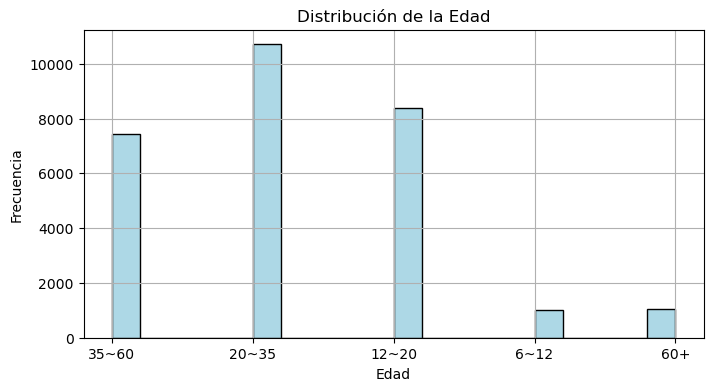

In [26]:
# Edad
plt.figure(figsize=(8, 4))
datos_seleccionados['Age'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
datos_seleccionados.groupby('Age').size()

Age
12~20     8371
20~35    10709
35~60     7424
60+       1039
6~12      1003
dtype: int64

In [30]:
datos_seleccionados.groupby('Gender').size()

Gender
Female    11164
Male      10913
Others     6469
dtype: int64

In [32]:
datos_seleccionados.groupby('fav_music_genre').size()

fav_music_genre
All                           470
Classical                    3120
Classical & melody, dance     439
Electronic/Dance              447
Jazz                         3085
Kpop                          439
Melody                       5555
Old songs                     397
Pop                          4523
Rap                          4617
Rock                         3578
classical                    1398
trending songs random         478
dtype: int64

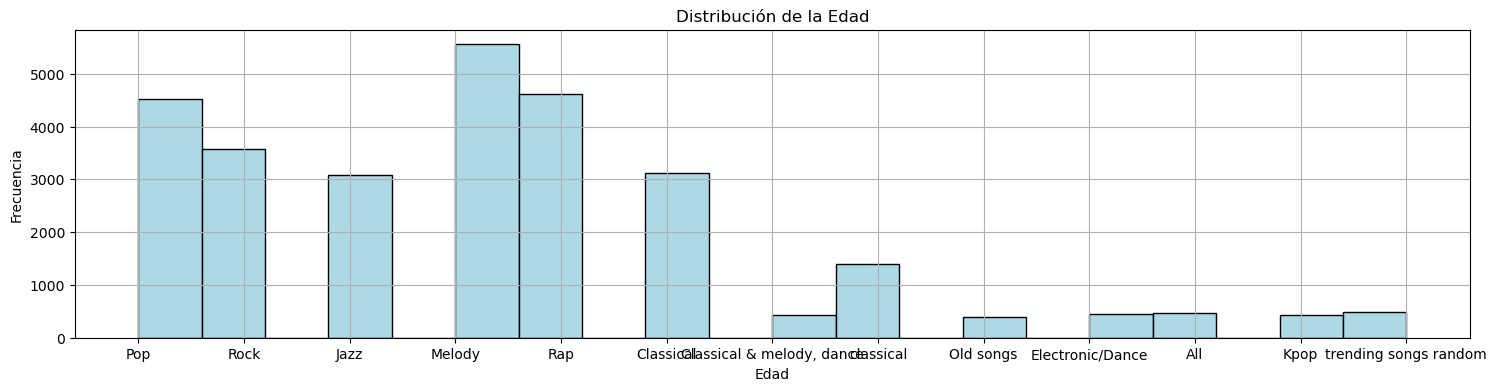

In [34]:
# Edad
plt.figure(figsize=(18, 4))
datos_seleccionados['fav_music_genre'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Verificacion duplicados o incosistencias


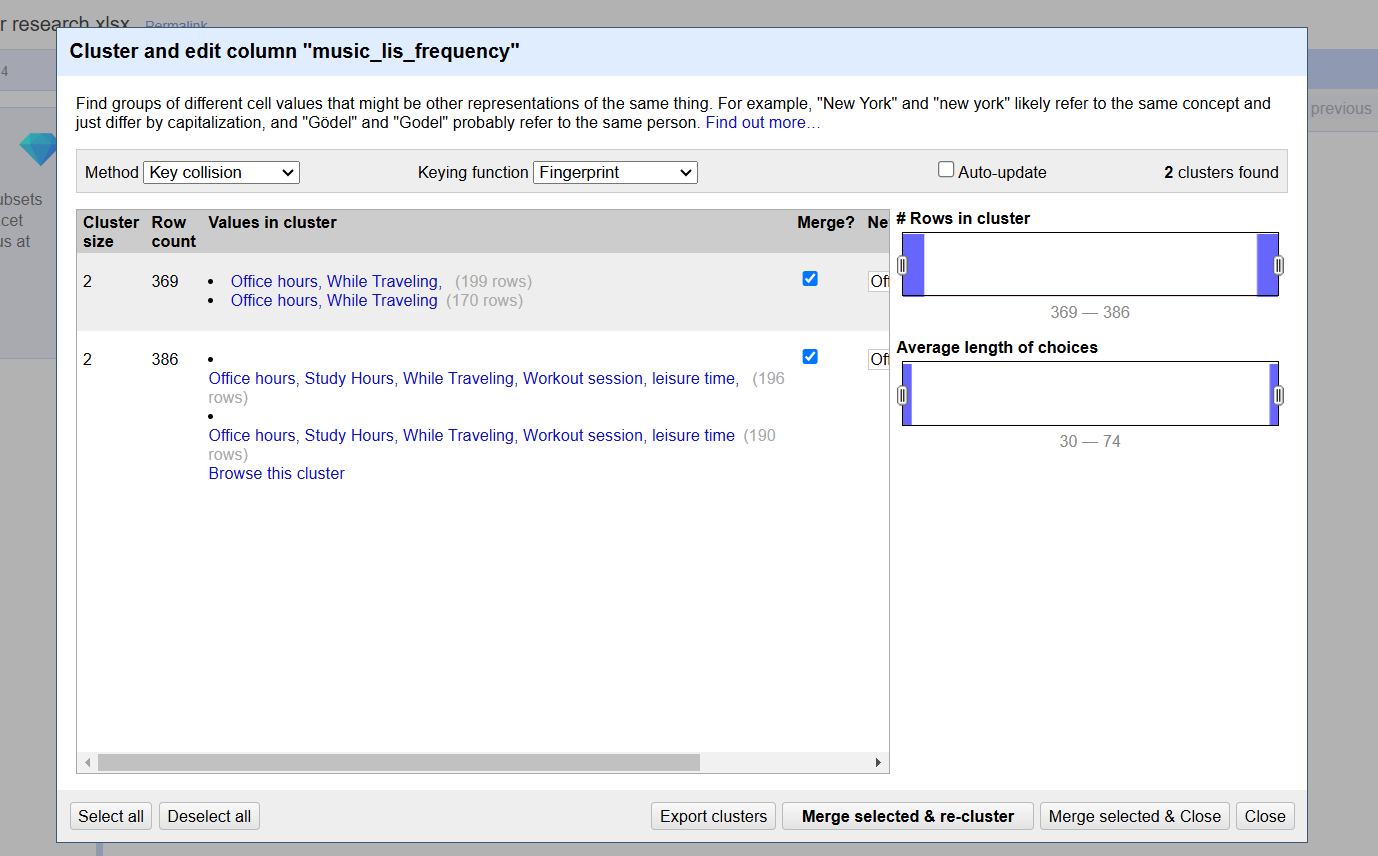

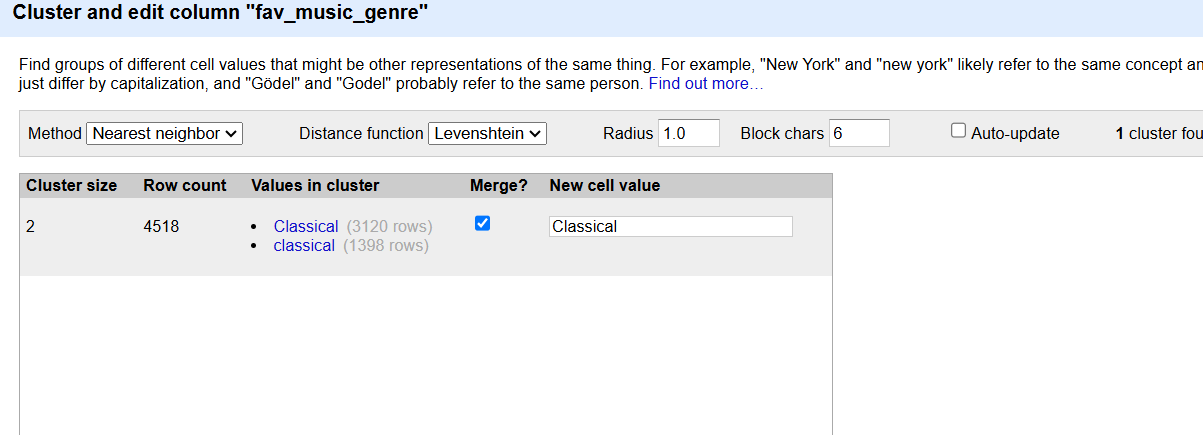

In [311]:
from IPython.display import Image

# Ruta de la imagen que quieres mostrar
image_path1 = '/Users/pere amat/CE/PROYECTO/DATAS/Clusters/dupli.png'
image_path2 ='/Users/pere amat/CE/PROYECTO/DATAS/Clusters/dupli2.png'
display(Image(filename=image_path1))
display(Image(filename=image_path2))

In [313]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [315]:
df = pd.read_csv("/Users/pere amat/CE/PROYECTO/DATAS/Clusters/Spotify-user-research-xlsx.csv")

In [317]:
# Filtrar el DataFrame para eliminar los registros donde Gender sea "Others"
df = df[df['Gender'] != 'Others']

In [319]:
print(df["music_lis_frequency"].unique())

['Rarely' 'Once a week' 'Never' 'Several times a week' 'Daily'
 'leisure time' 'Workout session'
 'Office hours, Workout session, leisure time' 'Office hours'
 'While Traveling, leisure time'
 'Office hours, While Traveling, Workout session'
 'Office hours, While Traveling,'
 'Office hours, While Traveling, leisure time' 'Social gatherings'
 'While Traveling' 'While Traveling, Workout session, leisure time'
 'Study Hours' 'Study Hours, leisure time'
 'While Traveling, Workout session'
 'Study Hours, Workout session, leisure time'
 'Workout session, leisure time'
 'While Traveling, Workout session, leisure time, Night time, when cooking'
 'Office hours, While Traveling, Workout session, leisure time'
 'Study Hours, While Traveling, Workout session, leisure time'
 'Office hours, Study Hours, While Traveling, Workout session, leisure time,'
 'Office hours, leisure time' 'Study Hours, While Traveling'
 'Study Hours, Workout session'
 'Office hours, Study Hours, While Traveling, leisure tim

In [321]:
df.groupby('music_lis_frequency').size()

music_lis_frequency
Daily                                                                         2569
Never                                                                         2419
Office hours                                                                   211
Office hours, Study Hours, While Traveling                                     177
Office hours, Study Hours, While Traveling, Workout session                    185
Office hours, Study Hours, While Traveling, Workout session, leisure time,     377
Office hours, Study Hours, While Traveling, leisure time                       336
Office hours, Study Hours, Workout session                                     200
Office hours, While Traveling,                                                 359
Office hours, While Traveling, Workout session                                 221
Office hours, While Traveling, Workout session, leisure time                   186
Office hours, While Traveling, leisure time                        

In [323]:

df.groupby('music_Influencial_mood').size()

music_Influencial_mood
Relaxation and stress relief                                                                                     6310
Relaxation and stress relief, Sadness or melancholy                                                               364
Relaxation and stress relief, Sadness or melancholy, Social gatherings or parties                                 327
Relaxation and stress relief, Social gatherings or parties                                                        371
Relaxation and stress relief, Uplifting and motivational                                                          376
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   356
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     374
Relaxation and stress relief, Uplifting and motivational, Social gatherings or parties                            331
Sadness or melancholy            

## Pasos para optimizar la columna music_lis_frequency:

 agrupar estas combinaciones en categorías que representen situaciones generales como:

Work
Study
Travel
Leisure
Workout
Social

1. Agrupar las combinaciones de situaciones
Para agrupar las combinaciones, puedes crear un diccionario que mapee las combinaciones más complejas a categorías simplificadas.

## 2. Limpia y agrupa los datos

Agrupa valores similares en categorías más generales:
Ejemplo: Si en fav_music_genre tienes valores como "Rock alternativo" y "Rock clásico", agrúpalos bajo "Rock".
Haz lo mismo con music_Influencial_mood agrupando categorías similares como "Relaxation" y "Stress relief" → "Relajación".
Estándariza los rangos de edad si hay demasiados valores inconsistentes.

He revisado y hay alguna variable que me interesa o agrupar mas o basicamente que en vez de tener un nombre muy largo sea mas corto para identificarlo 
mas rapido: 

#### Definir un diccionario de mapeo para simplificar las categorías

In [332]:
# Definir un diccionario de mapeo con las agrupaciones simplificadas
mood_mapping = {
    'Relaxation and stress relief': 'Relaxation',
    'Relaxation and stress relief, Sadness or melancholy': 'Relaxation, Sadness',
    'Relaxation and stress relief, Sadness or melancholy, Social gatherings or parties': 'Relaxation, Sadness, Social',
    'Relaxation and stress relief, Social gatherings or parties': 'Relaxation, Social',
    'Relaxation and stress relief, Uplifting and motivational': 'Relaxation, Motivational',
    'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy': 'Relaxation, Motivational, Sadness',
    'Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties': 'Relaxation, Motivational, Sadness, Social',
    'Relaxation and stress relief, Uplifting and motivational, Social gatherings or parties': 'Relaxation, Motivational, Social',
    'Sadness or melancholy': 'Sadness',
    'Sadness or melancholy, Social gatherings or parties': 'Sadness, Social',
    'Social gatherings or parties': 'Social',
    'Uplifting and motivational': 'Motivational',
    'Uplifting and motivational, Sadness or melancholy': 'Motivational, Sadness',
    'Uplifting and motivational, Sadness or melancholy, Social gatherings or parties': 'Motivational, Sadness, Social',
    'Uplifting and motivational, Social gatherings or parties': 'Motivational, Social'
}

#### Aplicar el mapeo a la columna `music_Influencial_mood` de df

In [335]:
# Aplicar el mapeo y reemplazar los valores no mapeados con 'Other'
df['music_Influencial_mood'] = df['music_Influencial_mood'].map(mood_mapping).fillna('Other')

# Verificar los primeros registros para asegurar que los cambios se aplicaron correctamente
print(df[['music_Influencial_mood']].head())

  music_Influencial_mood
1                 Social
2             Relaxation
3                 Social
4                 Social
5                 Social


In [337]:

df.groupby('music_Influencial_mood').size()

music_Influencial_mood
Motivational                                 1664
Motivational, Sadness                         346
Motivational, Sadness, Social                 303
Motivational, Social                          372
Relaxation                                   6310
Relaxation, Motivational                      376
Relaxation, Motivational, Sadness             356
Relaxation, Motivational, Sadness, Social     374
Relaxation, Motivational, Social              331
Relaxation, Sadness                           364
Relaxation, Sadness, Social                   327
Relaxation, Social                            371
Sadness                                      5775
Sadness, Social                               311
Social                                       4497
dtype: int64

### AGRUPAR GENEROS PARECIDOS

In [340]:
df.groupby('fav_music_genre').size()

fav_music_genre
All                           467
Classical                    3476
Classical & melody, dance     425
Electronic/Dance              434
Jazz                         2066
Kpop                          428
Melody                       4452
Old songs                     387
Pop                          3482
Rap                          3494
Rock                         2492
trending songs random         474
dtype: int64

Hay una cosa que me he dado cuenta esta muy bien que haya muchos contextos pero en este caso no quiero saber la frecuencia de escucha de si escuchan o no
lo que quiero saber es de los que escuchan exactamente para que contexto escuchan msuica asi que eliminaremos los siguientes campos : # Contextos que quieres eliminar
contextos_no_deseados = [
    'Rarely', 'Once a week', 'Never', 'Several times a week', 'Daily''random'
]

In [343]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df' con una columna llamada 'music_lis_frequency' que contiene los contextos

# Contextos que quieres eliminar
contextos_no_deseados = [
    'Rarely', 'Once a week', 'Never', 'Several times a week', 'Daily','Random'
]

# Filtrar el DataFrame para eliminar los registros que contengan estos contextos
df = df[~df['music_lis_frequency'].isin(contextos_no_deseados)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9469 entries, 18637 to 28545
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     9469 non-null   object
 1   Gender                  9469 non-null   object
 2   fav_music_genre         9469 non-null   object
 3   music_time_slot         9469 non-null   object
 4   music_Influencial_mood  9469 non-null   object
 5   music_lis_frequency     9469 non-null   object
dtypes: object(6)
memory usage: 517.8+ KB


## 3. Explora patrones con un EDA

Realiza análisis para descubrir relaciones útiles para el recomendador:

Distribución de géneros favoritos por rango de edad y género.
Relación entre estados de ánimo/momentos del día y géneros musicales.
Frecuencia de escucha según edad/género para entender la longitud ideal de las playlists.
Visualiza estos patrones con gráficos como:

Barras apiladas (género musical por edad/género).
Heatmaps (correlación entre music_time_slot y fav_music_genre).

### Cual es el genero mas escuchado?

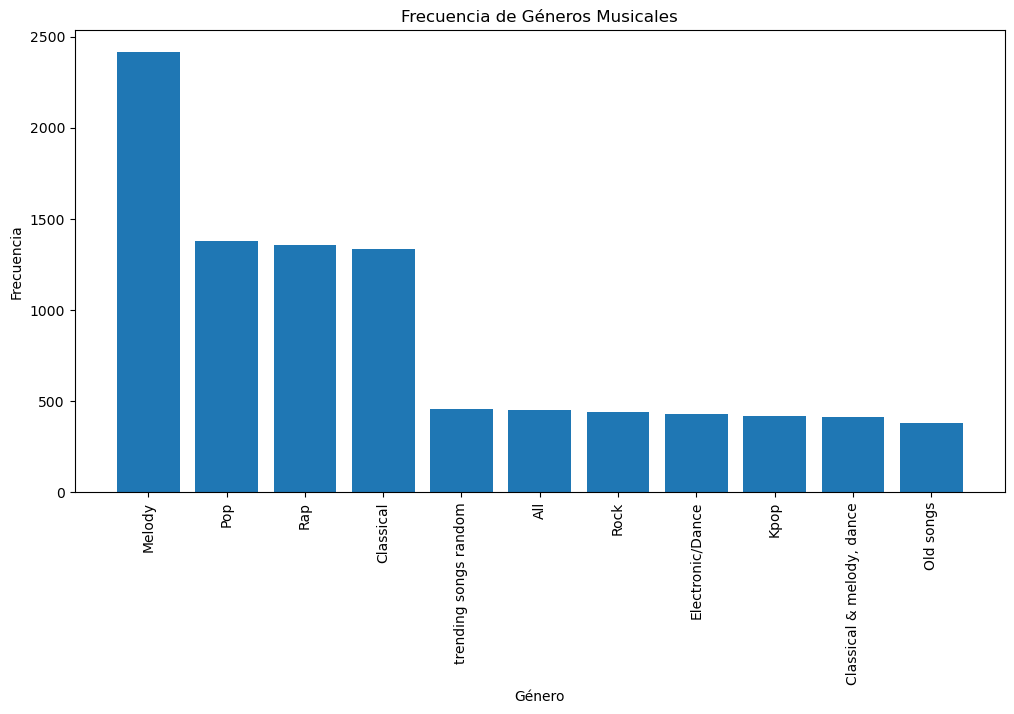

In [348]:
# Contar las ocurrencias de cada género
genre_counts = df['fav_music_genre'].value_counts()
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Frecuencia de Géneros Musicales')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X

plt.show()

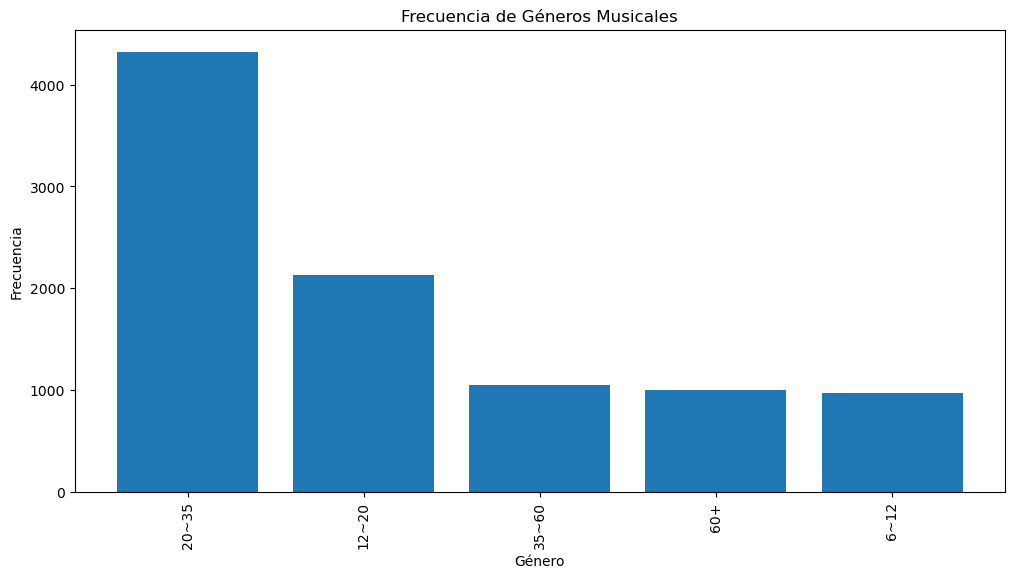

In [350]:
# Contar las ocurrencias de cada género
genre_counts = df['Age'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
plt.bar(genre_counts.index, genre_counts.values)

# Configurar etiquetas y título
plt.title('Frecuencia de Géneros Musicales')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X

# Mostrar el gráfico
plt.show()

###  visualizar cómo se distribuyen los géneros según la edad

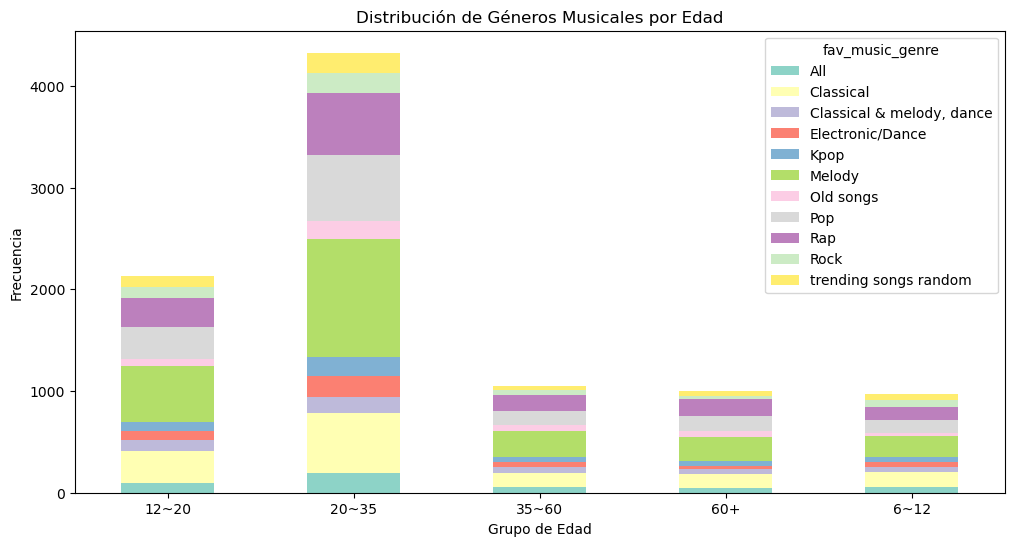

In [352]:
# Contar la frecuencia de géneros por grupo de edad
genre_age_distribution = pd.crosstab(df['Age'], df['fav_music_genre'])

# Crear el gráfico de barras apiladas
genre_age_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

# Configurar etiquetas y título
plt.title('Distribución de Géneros Musicales por Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X horizontales

# Mostrar el gráfico
plt.show()

Este paso de visualizar lo haremos en tableau mediante un dashboard

## Ajuste generos musicales

In [360]:
# Diccionario para mapear los valores actuales a los nuevos nombres
rename_mapping = {
    "Classical": "Ambiental y Relajante",
    "Classical & melody, dance": "Ambiental y Relajante",
    "Electronic/Dance": "Electrónica y House Alternativo",
    "Jazz": "Acústica y Nostálgica",
    "Kpop": "Pop Urbano y Ritmos Modernos",
    "Melody": "Música Cultural y Melódica",
    "Old songs": "Acústica y Nostálgica",
    "Pop": "Ritmos Globales y Festivos",
    "Rock": "Rock Electrónico y Energético",
    "Rap": "Pop Urbano y Ritmos Modernos",
    "trending songs random": "Ritmos Globales y Festivos"
    # Agregar más renombres según sea necesario
}

# Reemplazar valores en la columna 'fav_music_genre'
df["fav_music_genre"] = df["fav_music_genre"].replace(rename_mapping)

# Mostrar los cambios realizados
print(df[["fav_music_genre"]].drop_duplicates())


                       fav_music_genre
18637       Música Cultural y Melódica
18638     Pop Urbano y Ritmos Modernos
18642       Ritmos Globales y Festivos
18658            Ambiental y Relajante
18661    Rock Electrónico y Energético
18664            Acústica y Nostálgica
18686  Electrónica y House Alternativo
18692                              All


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9469 entries, 18637 to 28545
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     9469 non-null   object
 1   Gender                  9469 non-null   object
 2   fav_music_genre         9469 non-null   object
 3   music_time_slot         9469 non-null   object
 4   music_Influencial_mood  9469 non-null   object
 5   music_lis_frequency     9469 non-null   object
dtypes: object(6)
memory usage: 517.8+ KB


In [368]:
df['fav_music_genre'].value_counts()

fav_music_genre
Música Cultural y Melódica         2415
Ritmos Globales y Festivos         1836
Pop Urbano y Ritmos Modernos       1773
Ambiental y Relajante              1747
All                                 452
Rock Electrónico y Energético       439
Electrónica y House Alternativo     429
Acústica y Nostálgica               378
Name: count, dtype: int64

In [370]:
# Exportar el DataFrame a un archivo CSV
df.to_csv("cluster2.csv", index=False)

print("Base de datos exportada a 'output.csv'")


Base de datos exportada a 'output.csv'


## 4. Segmenta a los usuarios en perfiles

Datos demográficos: Edad, género.
Preferencias musicales: Género favorito, momento del día, estado de ánimo.
Por ejemplo:

"Jóvenes amantes del Pop en la tarde."
"Adultos relajados que prefieren Jazz en la noche."

Código para Segmentar Usuarios en Perfiles

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [82]:
df.describe()

,Age,Gender,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency
count,9469,9469,9469,9469,9469,9469
unique,5,2,11,3,15,31
top,20~35,Female,Melody,Night,Relaxation,leisure time
freq,4325,4863,2415,4798,2093,1405


In [84]:
df.groupby('music_lis_frequency').size()

music_lis_frequency
Office hours                                                                   211
Office hours, Study Hours, While Traveling                                     177
Office hours, Study Hours, While Traveling, Workout session                    185
Office hours, Study Hours, While Traveling, Workout session, leisure time,     377
Office hours, Study Hours, While Traveling, leisure time                       336
Office hours, Study Hours, Workout session                                     200
Office hours, While Traveling,                                                 359
Office hours, While Traveling, Workout session                                 221
Office hours, While Traveling, Workout session, leisure time                   186
Office hours, While Traveling, leisure time                                    200
Office hours, Workout session                                                  207
Office hours, Workout session, leisure time                        

### 3. Visualizar las nuevas categorías
Después de agrupar y transformar los valores, puedes verificar cómo se distribuyen las categorías en el dataset con una visualización:

In [86]:
music_frequency_mapping = {
    'leisure time': 0,
    'Workout session': 1,
    'Office hours, Workout session, leisure time': 2,
    'Office hours': 3,
    'While Traveling, leisure time': 4,
    'Office hours, While Traveling, Workout session': 5,
    'Office hours, While Traveling,': 6,
    'Office hours, While Traveling, leisure time': 7,
    'Social gatherings': 8,
    'While Traveling': 9,
    'While Traveling, Workout session, leisure time': 10,
    'Study Hours': 11,
    'Study Hours, leisure time': 12,
    'While Traveling, Workout session': 13,
    'Study Hours, Workout session, leisure time': 14,
    'Workout session, leisure time': 15,
    'While Traveling, Workout session, leisure time, Night time, when cooking': 16,
    'Office hours, While Traveling, Workout session, leisure time': 17,
    'Study Hours, While Traveling, Workout session, leisure time': 18,
    'Office hours, Study Hours, While Traveling, Workout session, leisure time,': 19,
    'Office hours, leisure time': 20,
    'Study Hours, While Traveling': 21,
    'Study Hours, Workout session': 22,
    'Office hours, Study Hours, While Traveling, leisure time': 23,
    'Study Hours, While Traveling, leisure time': 24,
    'Office hours, Workout session': 25,
    'Office hours, Study Hours, While Traveling': 26,
    'Study Hours, While Traveling, Workout session': 27,
    'Office hours, Study Hours, Workout session': 28,
    'While Traveling, Before bed': 29,
    'Office hours, Study Hours, While Traveling, Workout session': 30
}



In [88]:
time_slot_mapping = {
    'Afternoon': 0,
    'Evening': 1,
    'Morning': 2,
    'Night': 3
}


In [90]:
mood_mapping = {
    'Motivational': 0,
    'Motivational, Sadness': 1,
    'Motivational, Sadness, Social': 2,
    'Motivational, Social': 3,
    'Relaxation': 4,
    'Relaxation, Motivational': 5,
    'Relaxation, Motivational, Sadness': 6,
    'Relaxation, Motivational, Sadness, Social': 7,
    'Relaxation, Motivational, Social': 8,
    'Relaxation, Sadness': 9,
    'Relaxation, Sadness, Social': 10,
    'Relaxation, Social': 11,
    'Sadness': 12,
    'Sadness, Social': 13,
    'Social': 14
}


In [92]:
# Mapeo para la columna 'Gender'
gender_mapping = {
    'Female': 0,
    'Male': 1
}


In [94]:
# Mapeo para la columna 'Age'
age_mapping = {
    '12~20': 1,
    '20~35': 2,
    '35~60': 3,
    '60+': 4,
    '6~12': 5
}


In [96]:
# Mapeo para la columna 'Fav_Music_Genre'
music_genre_mapping = {
    'All': 1,
    'Classical': 2,
    'Classical & melody, dance': 3,
    'Electronic/Dance': 4,
    'Jazz': 5,
    'Kpop': 6,
    'Melody': 7,
    'Old songs': 8,
    'Pop': 9,
    'Rap': 10,
    'Rock': 11,
    'trending songs random': 12
}

In [98]:
# Aplicar el mapeo a la columna 'music_lis_frequency'
df['Music_Frequency_Coded'] = df['music_lis_frequency'].map(music_frequency_mapping)
df['Fav_Music_Genre_Coded'] = df['fav_music_genre'].map(music_genre_mapping)
df['Gender_Coded'] = df['Gender'].map(gender_mapping)
df['Age_Coded'] = df['Age'].map(age_mapping)
df['Mood_Coded'] = df['music_Influencial_mood'].map(mood_mapping)
df['Time_Slot_Coded'] = df['music_time_slot'].map(time_slot_mapping)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9469 entries, 18637 to 28545
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     9469 non-null   object
 1   Gender                  9469 non-null   object
 2   fav_music_genre         9469 non-null   object
 3   music_time_slot         9469 non-null   object
 4   music_Influencial_mood  9469 non-null   object
 5   music_lis_frequency     9469 non-null   object
 6   Music_Frequency_Coded   9469 non-null   int64 
 7   Fav_Music_Genre_Coded   9469 non-null   int64 
 8   Gender_Coded            9469 non-null   int64 
 9   Age_Coded               9469 non-null   int64 
 10  Mood_Coded              9469 non-null   int64 
 11  Time_Slot_Coded         9469 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 961.7+ KB


In [104]:
df_coded = df[['Gender_Coded','Age_Coded', 'Fav_Music_Genre_Coded', 'Time_Slot_Coded','Mood_Coded','Music_Frequency_Coded']].copy()

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_coded)  # Suponiendo que `df_coded` ya contiene datos preparados


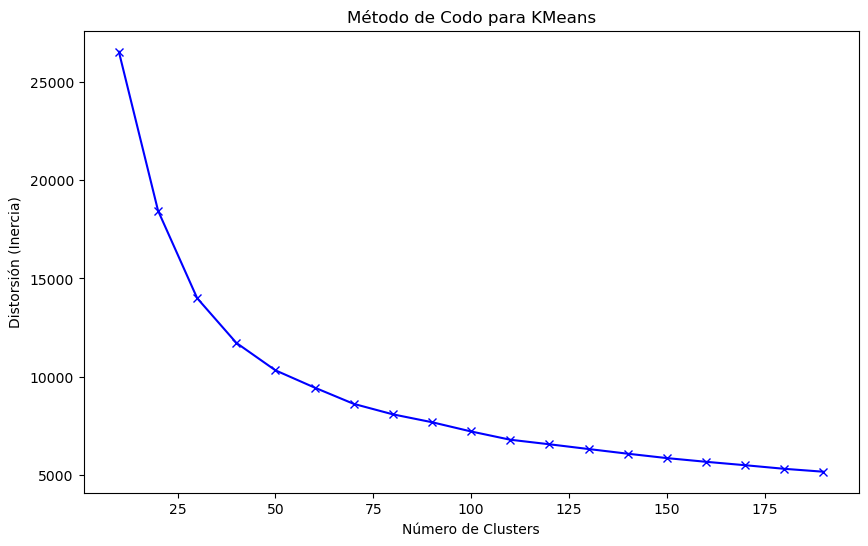

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(10, 200, 10)  # Prueba entre 10 y 200 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión (Inercia)')
plt.title('Método de Codo para KMeans')
plt.show()


In [64]:
# Calcular la reducción porcentual de inercia entre los números consecutivos de clústeres
reduccion_porcentual = [(distortions[i] - distortions[i + 1]) / distortions[i] * 100 for i in range(len(distortions) - 1)]

# Imprimir el porcentaje de reducción
for i, reduction in enumerate(reduccion_porcentual, start=10):  # empezamos desde el primer valor de K=10
    print(f"Reducción entre {i} y {i+10} clústeres: {reduction:.2f}%")
    
# Identificar el codo, si la reducción es menor al 10%
threshold = 10
for i, reduction in enumerate(reduccion_porcentual):
    if reduction < threshold:
        print(f"El codo probablemente ocurre entre {K[i]} y {K[i+1]} clústeres.")
        break


Reducción entre 10 y 20 clústeres: 30.43%
Reducción entre 11 y 21 clústeres: 24.12%
Reducción entre 12 y 22 clústeres: 16.21%
Reducción entre 13 y 23 clústeres: 11.91%
Reducción entre 14 y 24 clústeres: 8.47%
Reducción entre 15 y 25 clústeres: 8.76%
Reducción entre 16 y 26 clústeres: 6.16%
Reducción entre 17 y 27 clústeres: 4.94%
Reducción entre 18 y 28 clústeres: 6.11%
Reducción entre 19 y 29 clústeres: 5.80%
Reducción entre 20 y 30 clústeres: 3.40%
Reducción entre 21 y 31 clústeres: 3.67%
Reducción entre 22 y 32 clústeres: 3.75%
Reducción entre 23 y 33 clústeres: 3.66%
Reducción entre 24 y 34 clústeres: 3.19%
Reducción entre 25 y 35 clústeres: 3.05%
Reducción entre 26 y 36 clústeres: 3.32%
Reducción entre 27 y 37 clústeres: 2.77%
El codo probablemente ocurre entre 50 y 60 clústeres.


In [65]:
kmeans = KMeans(n_clusters=150, random_state=42)
kmeans.fit(df_scaled)

# Asigna los clusters a los datos originales
df_coded['Cluster'] = kmeans.labels_


In [66]:
print(df_coded['Cluster'].value_counts())  # Revisa cuántos usuarios hay en cada cluster


Cluster
3      141
5      125
42     123
20     110
125    106
      ... 
139     23
66      22
36      21
112     19
28      14
Name: count, Length: 150, dtype: int64


In [67]:
# Definir columnas categóricas y numéricas
categorical_columns = ['Gender_Coded','Age_Coded', 'Fav_Music_Genre_Coded', 'Time_Slot_Coded','Mood_Coded','Music_Frequency_Coded']
numeric_columns = []  # Añade columnas numéricas si las tienes

# Calcular perfiles categóricos
def get_mode(series):
    return series.mode()[0] if not series.mode().empty else None

cluster_profiles_categorical = df_coded.groupby('Cluster')[categorical_columns].apply(lambda x: x.apply(get_mode))

# Calcular perfiles numéricos
cluster_profiles_numeric = df_coded.groupby('Cluster')[numeric_columns].mean()

# Combinar perfiles categóricos y numéricos
final_cluster_profiles = pd.concat([cluster_profiles_categorical, cluster_profiles_numeric], axis=1)


In [68]:
print(final_cluster_profiles)


         Gender_Coded  Age_Coded  Fav_Music_Genre_Coded  Time_Slot_Coded  \
Cluster                                                                    
0                   1          3                      7                3   
1                   0          2                      7                0   
2                   0          1                      2                3   
3                   0          2                      7                3   
4                   1          2                      9                2   
...               ...        ...                    ...              ...   
145                 1          1                      7                3   
146                 1          2                      2                3   
147                 0          5                      7                0   
148                 1          2                      7                2   
149                 1          2                      2                3   

         Mo

In [69]:
df_new = df_coded.copy()

In [70]:
df_new.head()

,Gender_Coded,Age_Coded,Fav_Music_Genre_Coded,Time_Slot_Coded,Mood_Coded,Music_Frequency_Coded,Cluster
18637,0,2,7,3,12,0,30
18638,1,1,10,0,14,1,40
18640,0,2,7,3,11,2,30
18641,0,2,7,3,4,0,42
18642,1,2,9,3,0,1,38


## Solución desbalanceo

He observado que esta muy desbalanceado ya que me elimina de hechos algunas edades, eso es debido a que hay muchos mas registros de unos campso en 
concreto por lo tanto utilizaremso Smote para evitar que este desbalanceado

In [134]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supongamos que df_new es tu DataFrame original con 5000 usuarios

# 1. Manejo de valores faltantes
imputer = SimpleImputer(strategy='most_frequent')  # Rellenamos valores faltantes con la moda
df_imputed = pd.DataFrame(imputer.fit_transform(df_new), columns=df_new.columns)

# 2. Escalado de los datos numéricos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# 3. Clustering con KMeans
num_clusters = 1000  # Queremos reducir a 100 perfiles representativos
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(df_scaled)

# 4. Crear perfiles representativos con valores concretos
def crear_perfil_concreto(cluster_data):
    perfil = {}
    
    # Asegurarse de que el cluster no esté vacío
    if cluster_data.empty:
        return None
    
    # Recorrer todas las columnas y crear un perfil para cada una
    for col in cluster_data.columns:
        if col == 'Cluster':
            continue
        
        if cluster_data[col].dtype in ['float64', 'int64']:  # Variables numéricas
            # Eliminar NaN y verificar si hay datos suficientes
            valid_data = cluster_data[col].dropna()
            if not valid_data.empty:  # Verifica si hay datos numéricos
                media = valid_data.mean()
                # Seleccionar el valor más cercano a la media de los valores reales en el cluster
                try:
                    valor_concreto = valid_data.iloc[(valid_data - media).abs().idxmin()]
                    perfil[col] = valor_concreto
                except:
                    perfil[col] = valid_data.iloc[0]  # Si hay error, se asigna el primer valor disponible
            else:
                perfil[col] = None  # Si no hay datos, asigna None
        else:  # Variables categóricas
            valid_data = cluster_data[col].dropna()
            if not valid_data.empty:  # Verifica si hay datos categóricos
                perfil[col] = valid_data.mode()[0]
            else:
                perfil[col] = None  # Si no hay datos, asigna None
    return perfil

# Generamos un perfil para cada cluster
usuarios_representativos = []
for cluster_id in range(num_clusters):
    cluster_data = df_new[df_new['Cluster'] == cluster_id].drop(columns=['Cluster'])
    perfil = crear_perfil_concreto(cluster_data)
    if perfil:  # Solo agrega perfiles válidos
        perfil['Cluster'] = cluster_id
        usuarios_representativos.append(perfil)

# Convertimos los perfiles a un DataFrame final
df_perfiles = pd.DataFrame(usuarios_representativos)

# 5. Mostrar resultados
print("Usuarios representativos (perfiles finales):")
print(df_perfiles)

# Opcional: Guardar los resultados en un archivo
df_perfiles.to_csv("perfiles_representativos.csv", index=False)


Usuarios representativos (perfiles finales):
     Gender_Coded  Age_Coded  Fav_Music_Genre_Coded  Time_Slot_Coded  \
0               1          2                     12                0   
1               1          2                      7                3   
2               0          2                      7                3   
3               0          5                     10                3   
4               0          1                      4                0   
5               0          2                      9                2   
6               1          2                      9                2   
7               1          4                      7                2   
8               0          3                      2                2   
9               0          2                      9                0   
10              0          2                      7                2   
11              1          1                      2                3   
12              0  

In [136]:
import pandas as pd

# Cargar el archivo CSV
df_perfiles = pd.read_csv("perfiles_representativos.csv")

# Mostrar el contenido
print(df_perfiles)


     Gender_Coded  Age_Coded  Fav_Music_Genre_Coded  Time_Slot_Coded  \
0               1          2                     12                0   
1               1          2                      7                3   
2               0          2                      7                3   
3               0          5                     10                3   
4               0          1                      4                0   
5               0          2                      9                2   
6               1          2                      9                2   
7               1          4                      7                2   
8               0          3                      2                2   
9               0          2                      9                0   
10              0          2                      7                2   
11              1          1                      2                3   
12              0          1                      1             

In [140]:
# Importar pandas
import pandas as pd

# Supongamos que tienes un DataFrame codificado con estas columnas
# Sustituye este ejemplo por tu DataFrame real
df_perfiles = pd.read_csv("perfiles_representativos.csv")
df_codificado = pd.DataFrame(df_perfiles)

# Mapeos completos
gender_mapping = {
    'Female': 0,
    'Male': 1
}
age_mapping = {
    '12~20': 1,
    '20~35': 2,
    '35~60': 3,
    '60+': 4,
    '6~12': 5
}
music_genre_mapping = {
    'All': 1,
    'Classical': 2,
    'Classical & melody, dance': 3,
    'Electronic/Dance': 4,
    'Jazz': 5,
    'Kpop': 6,
    'Melody': 7,
    'Old songs': 8,
    'Pop': 9,
    'Rap': 10,
    'Rock': 11,
    'trending songs random': 12
}
time_slot_mapping = {
    'Afternoon': 0,
    'Evening': 1,
    'Morning': 2,
    'Night': 3
}
mood_mapping = {
    'Motivational': 0,
    'Motivational, Sadness': 1,
    'Motivational, Sadness, Social': 2,
    'Motivational, Social': 3,
    'Relaxation': 4,
    'Relaxation, Motivational': 5,
    'Relaxation, Motivational, Sadness': 6,
    'Relaxation, Motivational, Sadness, Social': 7,
    'Relaxation, Motivational, Social': 8,
    'Relaxation, Sadness': 9,
    'Relaxation, Sadness, Social': 10,
    'Relaxation, Social': 11,
    'Sadness': 12,
    'Sadness, Social': 13,
    'Social': 14
}
music_frequency_mapping = {
    'leisure time': 0,
    'Workout session': 1,
    'Office hours, Workout session, leisure time': 2,
    'Office hours': 3,
    'While Traveling, leisure time': 4,
    'Office hours, While Traveling, Workout session': 5,
    'Office hours, While Traveling,': 6,
    'Office hours, While Traveling, leisure time': 7,
    'Social gatherings': 8,
    'While Traveling': 9,
    'While Traveling, Workout session, leisure time': 10,
    'Study Hours': 11,
    'Study Hours, leisure time': 12,
    'While Traveling, Workout session': 13,
    'Study Hours, Workout session, leisure time': 14,
    'Workout session, leisure time': 15,
    'While Traveling, Workout session, leisure time, Night time, when cooking': 16,
    'Office hours, While Traveling, Workout session, leisure time': 17,
    'Study Hours, While Traveling, Workout session, leisure time': 18,
    'Office hours, Study Hours, While Traveling, Workout session, leisure time,': 19,
    'Office hours, leisure time': 20,
    'Study Hours, While Traveling': 21,
    'Study Hours, Workout session': 22,
    'Office hours, Study Hours, While Traveling, leisure time': 23,
    'Study Hours, While Traveling, leisure time': 24,
    'Office hours, Workout session': 25,
    'Office hours, Study Hours, While Traveling': 26,
    'Study Hours, While Traveling, Workout session': 27,
    'Office hours, Study Hours, Workout session': 28,
    'While Traveling, Before bed': 29,
    'Office hours, Study Hours, While Traveling, Workout session': 30
}

# Función para descodificar una columna
def decode_column(df, column, mapping):
    """
    Descodifica una columna del DataFrame usando un mapeo.
    
    Args:
    - df (pd.DataFrame): DataFrame con datos codificados.
    - column (str): Nombre de la columna a descodificar.
    - mapping (dict): Diccionario de mapeo.
    
    Returns:
    - pd.Series: Columna descodificada.
    """
    inverse_mapping = {v: k for k, v in mapping.items()}
    return df[column].map(inverse_mapping)

# Descodificar cada columna codificada
df_codificado['Gender'] = decode_column(df_codificado, 'Gender_Coded', gender_mapping)
df_codificado['Age'] = decode_column(df_codificado, 'Age_Coded', age_mapping)
df_codificado['Fav_Music_Genre'] = decode_column(df_codificado, 'Fav_Music_Genre_Coded', music_genre_mapping)
df_codificado['Time_Slot'] = decode_column(df_codificado, 'Time_Slot_Coded', time_slot_mapping)
df_codificado['Mood'] = decode_column(df_codificado, 'Mood_Coded', mood_mapping)
df_codificado['Music_Frequency'] = decode_column(df_codificado, 'Music_Frequency_Coded', music_frequency_mapping)

# Eliminar columnas codificadas si ya no son necesarias
df_codificado = df_codificado.drop(columns=['Gender_Coded', 'Age_Coded', 'Fav_Music_Genre_Coded', 
                                            'Time_Slot_Coded', 'Mood_Coded', 'Music_Frequency_Coded'])

# Ver el DataFrame descodificado
print(df_codificado)

# Opcional: Guardar el DataFrame descodificado en un archivo CSV
df_codificado.to_csv("perfiles_descodificados.csv", index=False)


     Cluster  Gender    Age            Fav_Music_Genre  Time_Slot  \
0          0    Male  20~35      trending songs random  Afternoon   
1          1    Male  20~35                     Melody      Night   
2          2  Female  20~35                     Melody      Night   
3          3  Female   6~12                        Rap      Night   
4          4  Female  12~20           Electronic/Dance  Afternoon   
5          5  Female  20~35                        Pop    Morning   
6          6    Male  20~35                        Pop    Morning   
7          7    Male    60+                     Melody    Morning   
8          8  Female  35~60                  Classical    Morning   
9          9  Female  20~35                        Pop  Afternoon   
10        10  Female  20~35                     Melody    Morning   
11        11    Male  12~20                  Classical      Night   
12        12  Female  12~20                        All      Night   
13        13    Male   6~12       

In [144]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cluster          1000 non-null   int64 
 1   Gender           1000 non-null   object
 2   Age              1000 non-null   object
 3   Fav_Music_Genre  1000 non-null   object
 4   Time_Slot        1000 non-null   object
 5   Mood             1000 non-null   object
 6   Music_Frequency  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [146]:
import pandas as pd

# Asegúrate de que se muestren todas las filas
pd.set_option('display.max_rows', None)

# Ver valores únicos y contar cuántas veces aparece cada uno en 'track_genre'
value_counts = df_codificado['Fav_Music_Genre'].value_counts()

print("Valores únicos y sus frecuencias en la columna 'track_genre':")
print(value_counts)


Valores únicos y sus frecuencias en la columna 'track_genre':
Fav_Music_Genre
Melody                       230
Classical                    173
Pop                          145
Rap                          140
All                           56
Electronic/Dance              54
trending songs random         49
Rock                          44
Kpop                          43
Old songs                     35
Classical & melody, dance     31
Name: count, dtype: int64


### Afegir cancion a cada clusters

In [160]:
df_codificado.groupby('Age').size()

Age
12~20    224
20~35    353
35~60    150
60+      137
6~12     136
dtype: int64